# Ivy Wong, xw2860@columbia.edu

# Projects in Advanced Machine Learning (QMSS Spring 2023)

# https://github.com/ivster/adv_ml_proj

#[Project 1](https://github.com/ivster/adv_ml_proj/blob/master/Project%20Portfolio/assignment_1/Assignment_1.ipynb)

## Description of Dataset:

### The goal of this assignment was to create a successful model that predicts happiness rankings. The dataset used was the United Nation's World Happiness Rankings, which is broken down by country level data. 

The features used in this dataset include:


* GDP per capita
* Social support
* Healthy life expectancy	
* Freedom to make life choices
* Generosity
* Perceptions of corruption
* Terrorist attacks

Features such as region, name, sub-region, and country or region were removed when building the predictive models.


### As mentioned above, the goal of this assignment was to predict happiness rankings. As such, the target variable is the level of happiness, separated into the following categories:

* Average
* Low
* High
* Very High
* Very Low



### To visualize the relationship between the features and target, shown below is automatic feature selection using Sklearn's permutation_importance function.


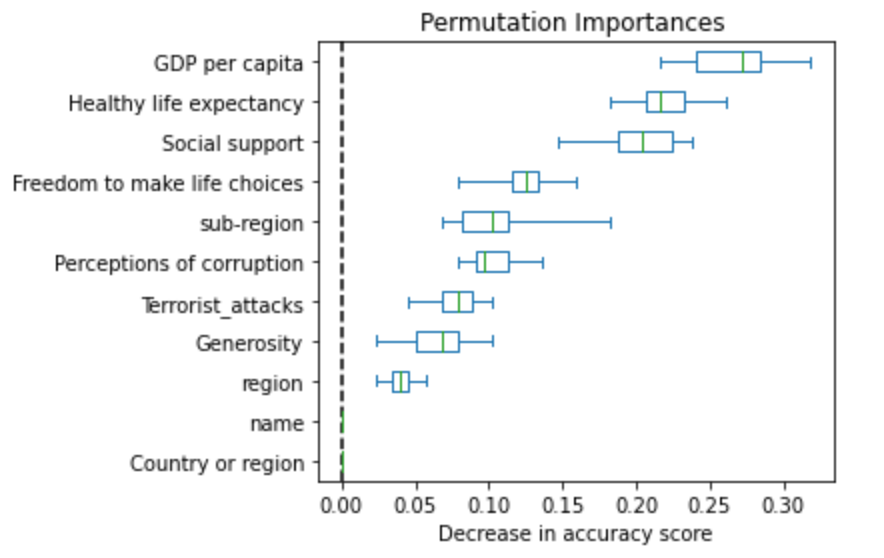

## Preprocessing

### For this dataset, the data was preprocessed by removing identifying features such as country or region, region, name, and also scaling the numeric features in the dataset. The code is as follows:

In [ ]:
# Preprocessing data 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

## Predictive Models Used

### One model used for this assignment is Random Forest Classifier. This model was chosen because tree models allow for multiclass classification and feature selection, which would come in handy in determining which features matter most in predicting happiness across countries. 

### Another ensemble model used for this assignment is the Gradient Boost model. Similar to Random Forest's multiclass classification and feature selection as beneficial traits of the model, Gradient Boost models are able to learn on errors from previous models in the ensemble, making this model helpful in reducing bias and having better predictive accuracy. 

### Finally, another model used for the assignment is the Support Vector Machine model. This model was chosen with a similar reason with the Random Forest model– this being that the model allows for multiclass classification. Another reason behind this choice is also SVM's ability to handle high-dimensional data, as the algorithm finds the most optimal hyperplane in high-dimensional feature spaces.

### To visualize how well these models performed, here are each tuned model's performances by metric:

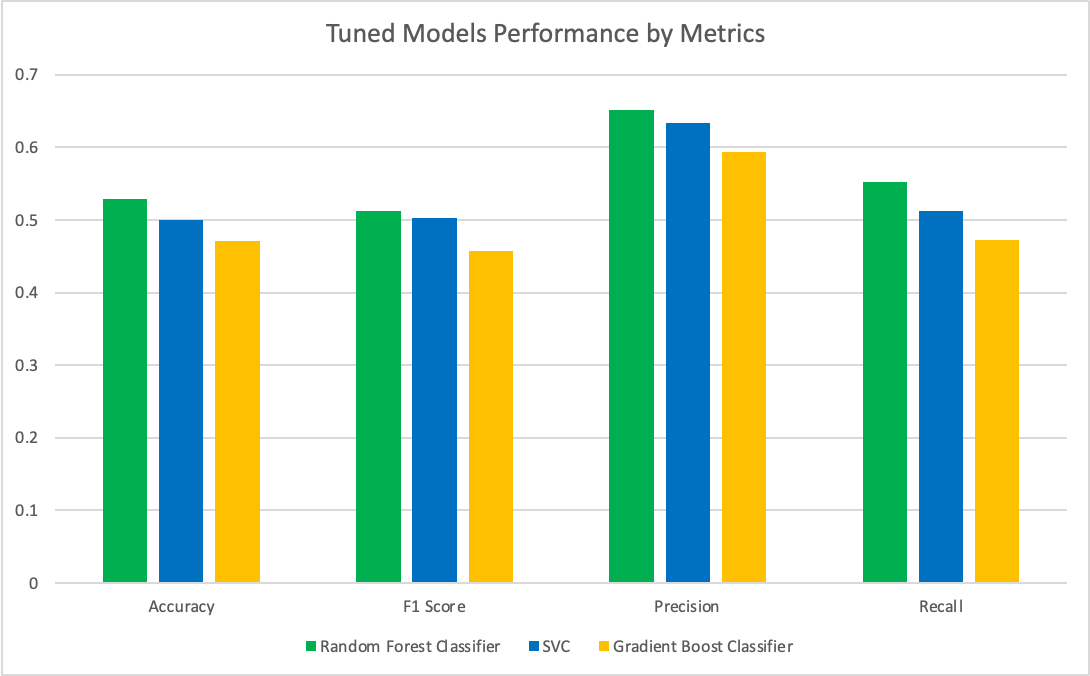

### As such, we see that the Random Forest Classifier model outperforms SVC and Gradient Boost for each performance metric, indicating a better model.

## Comparison to others on the leaderboard

### Visualization of the best models:

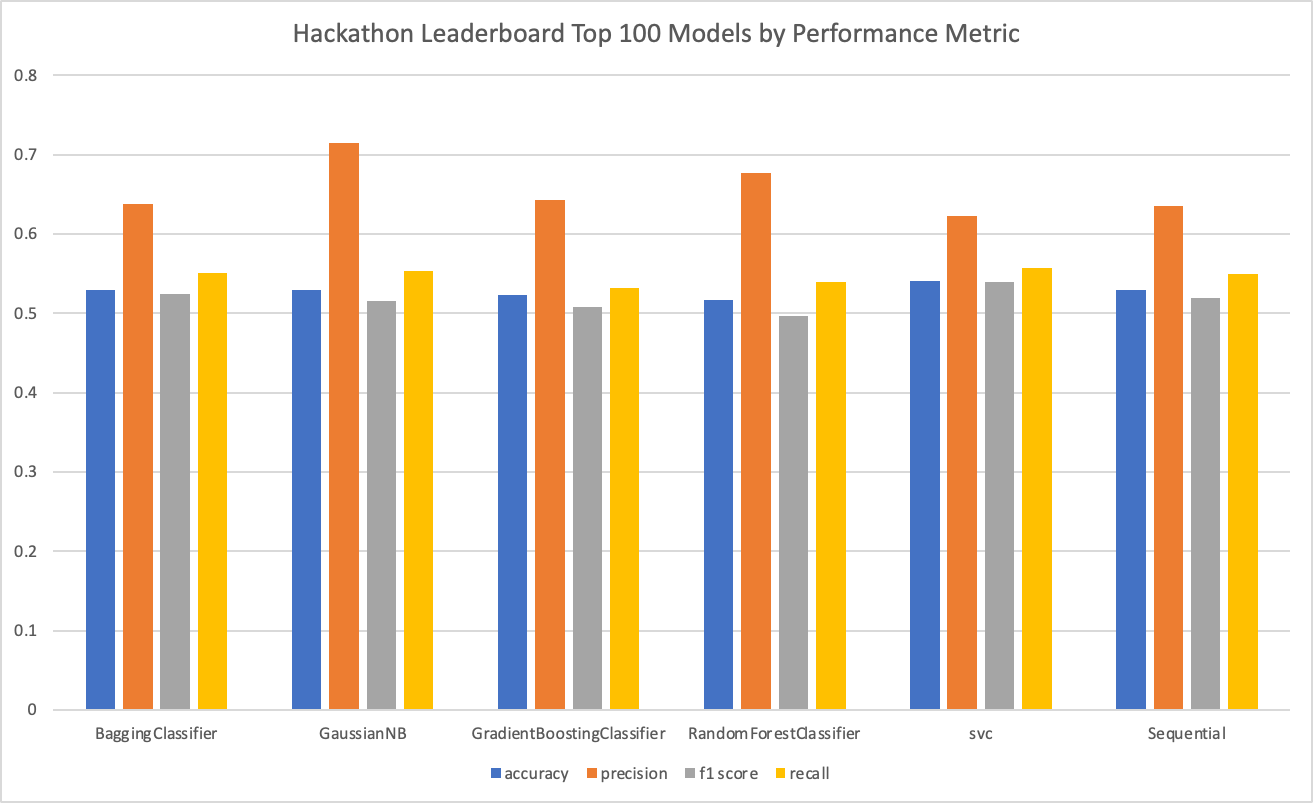

### The above visualization was done by taking the top 100 performing models on the Happiness Classification hackathon leaderboard and the mean was calculated on them. As such, models that performed the best were:



1. Bagging Classifer
2. Gaussian Naive Bayes
3. Gradient Boost
4. Random Forest
5. SVC
6. Sequential (Neural Networks)


### Looking at the performance metrics, we see that there is most variation with the precision metric from the leaderboard. Hence, using that as a way to compare these models, we see that Gaussian NB had the best precision score, suggesting that this model would be helpful in predicting happiness rankings. This may be due to two reasons:

1. The dataset used is relatively small, at less than 100 observations. GNB usually utilizes smaller training data points, and this may have contributed to a less complex model, allowing for precision over complexity.
2. Another thing GNB takes into account is low feature importance. If only a subset of features are important in the prediction, GNB comes in handy as it treats each feature independently. Referring back to the feature importance shown above, we saw that only GDP, life expectancy and social support were important features. This may suggest that GNB would be more effective in building predictions just based on these features.


#[Project 2](https://github.com/ivster/adv_ml_proj/blob/master/Project%20Portfolio/assignment_2/Assignment_2.ipynb)

## Description of Dataset:

### The goal of this assignment was to create a successful model that predicts COVID-19 radiography information. Images of radiographic scans were the feature variable, and these images were categorized into the following target categories:

1. Normal
2. Pneumonia
3. COVID-19

### By building a predictive model using COVID radiography data, this helps to streamline the COVID-19 diagnosis and treatment process. With a predictive model, this allows for early detection of COVID-19, accurate diagnosis as well as optimal resource allocation. As such, health care professionals would benefit the most from a model like this, streamlining the whole process for future patients and allowing for health care workers to provide treatment as soon as possible.


### To illustrate the dataset, here are some of the X-Ray images:

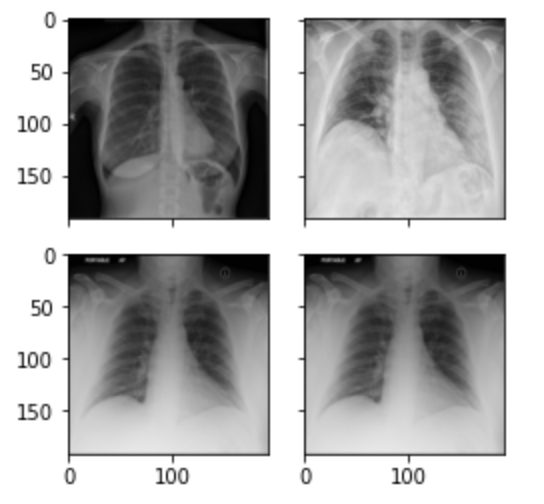

## Preprocessing

### For this dataset, because we are working with image data, the preprocessor ensures that the images all fit with the model's expected input shape (by making all images the same ratio), and create a file path to the images data. Here is the code:

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img

#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

## Predictive Models Used

### One model that I used was the Keras Neural Network model, and this is because Keras is very powerful and flexible, which makes it well-suited for image data processing tasks due to its high-level API, flexibility and customization, pre-processing capabilities, and support for various neural network architectures.

### Another model I used was the Inception Model, and inception models have shown to achieve high accuracy on various image classification benchmarks, including the ImageNet Large Scale Visual Recognition Challenge (ILSVRC). Hence, due to the model's unique architecture, which incorporates parallel convolutional branches with different filter sizes, this allows it to capture features of different scales, leading to improved accuracy in capturing fine-grained details in images.

### Another model that was used in this project is the ResNet model with transfer learning. ResNet, which has also displayed good performances in the classification benchmark like the Inception Model, combined witht transfer learning can be useful in predicting image data as the model has already learned generic features from a large dataset, and can be fine-tuned on a smaller dataset for a specific task, such as predicting image data.

### To visualize how well these models performed, here are each tuned model's performances by metric:

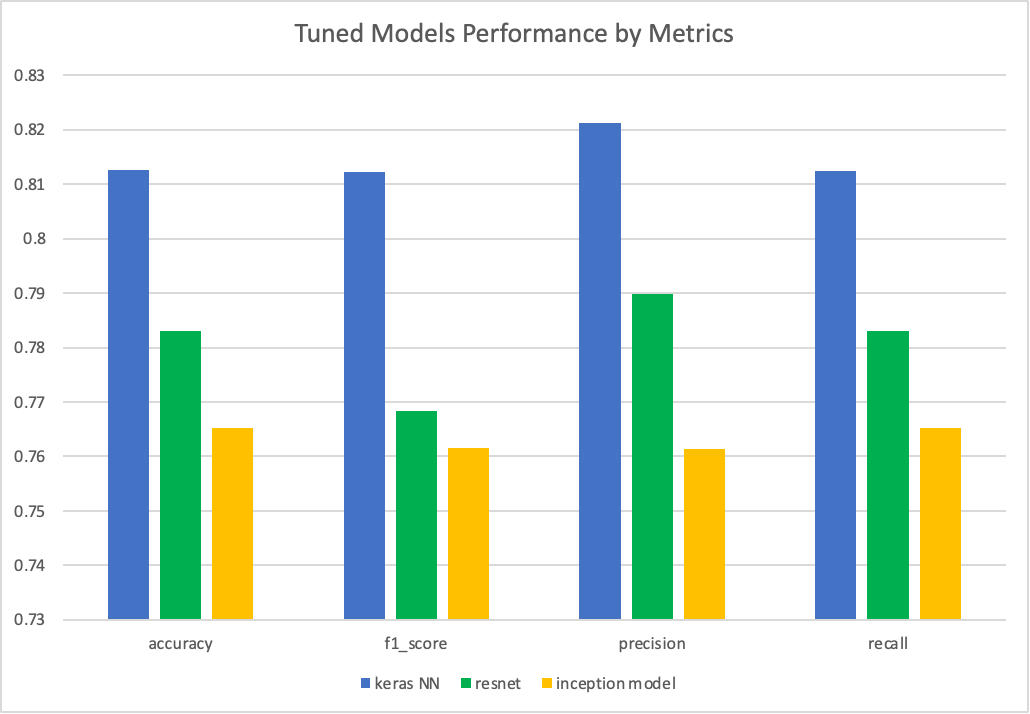

### As such, the Keras Neural Network model performed best across accuracy, f1 score, precision and recall.

## Comparison to others on the leaderboard

### Visualization of the best models:

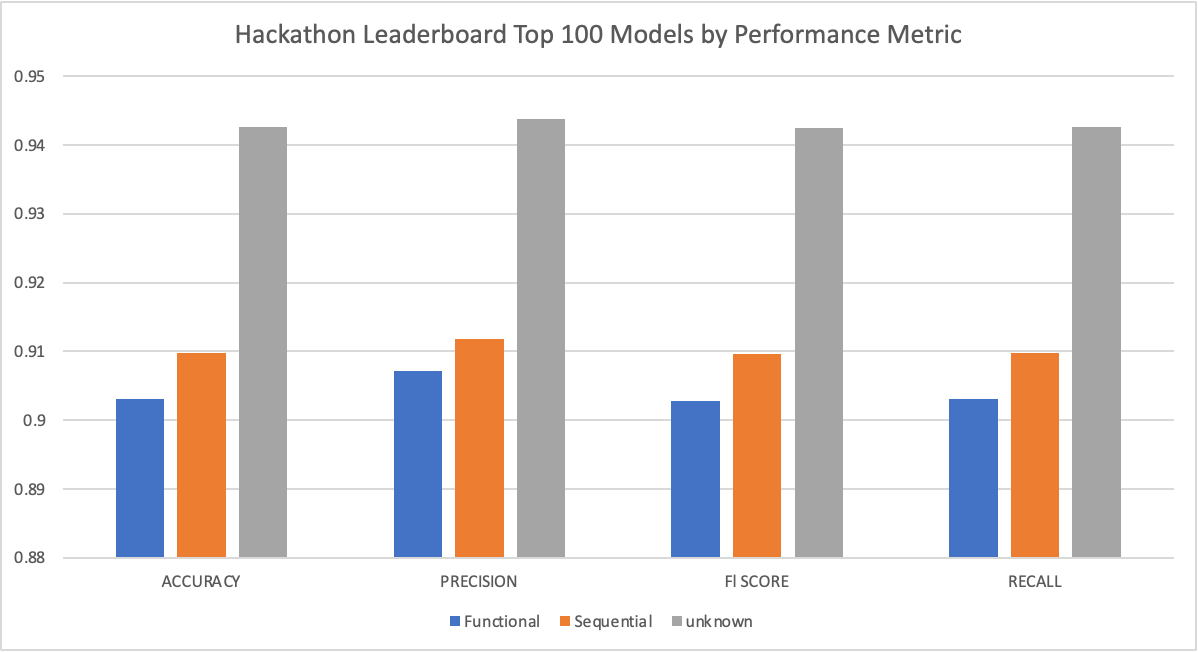


### In the context of this project, due to the constraints of the leaderboard, 'unknown' model type here refers to other models, mainly Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNN). For CNNs, they process grid-like data, such as images, and they take advantage of their unique architecture to automatically learn features from images, such as edges, corners, and textures, through convolutional and pooling layers. RNNs would also work better in this context as they model sequential data, where the order of the data points matters. This might be important in the context of COVID-19 radiography data, where temporal elemancy might matter.

#[Project 3](https://github.com/ivster/adv_ml_proj/blob/master/Project%20Portfolio/assignment_3/Assignment_3.ipynb)

## Description of Dataset:



### The dataset used in this project is the Stanford Sentiment Treebank (SST), a dataset that contains movie reviews and is used for sentiment analysis. The reviews are broken down into two categories:

1. Positive Sentiment
2. Negative Sentiment

### Building a predictive model with this data is useful particularly for people from this specific industry, like media/ film businesses, because the model allows for them to analyze reviews and comments and gain an understanding of customer sentiment. In addition, understanding the type of sentiment customers are using also helps businesses in their product development stages. By analyzing the type of sentiment displayed by their cusomters, they can allocate resources necessarily. For example, using movies with positive sentiment as a baseline for the types of movies being produced.


### To illustrate the data, here are some of the reviews from the training data:

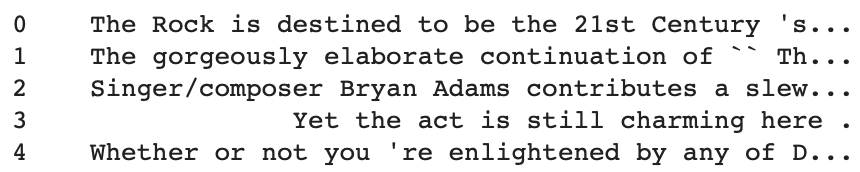

## Preprocessing

### For the text data, this data was preprocessed by utilizing Tenserflow's tokenizer function. By doing this, the words from the reviews are tokenized and all the documents are transformed into the same length. Here is the code for this preprocessor:

In [ ]:
# This preprocessor function makes use of the tf.keras tokenizer

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# Build vocabulary from training text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# preprocessor tokenizes words and makes sure all documents have the same length
def preprocessor(data, maxlen=40, max_words=10000):

    sequences = tokenizer.texts_to_sequences(data)

    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=maxlen)

    return X

## Predictive Models Used

### The first model I used for this project was a Keras model with *embedding* and *Conv1D* layers in the model. An embedding layers helps to represent words in a continuous vector space, capturing their semantic meaning and contextual relationships, while Conv1D layers were useful in capturing local patterns or features from the text data, which is useful in letting the model learn the sentiment from the data.

### In my second model, I used embedding layers again, but this time with *LSTM* layers. LSTM(Long Term Short Memory) layers not only can capture sequential dependencies, but also can handle text data of varying lengths, which is a common characteristic of movie reviews or text data in general. This is useful specifically for reviews that were longer than normal reviews.

### Lastly, the third model used was with transfer learning and GloVe embedding on embedding and dense layers. As mentioned in Project 2, transfer learning allows for leveraging knowledge learned from pre-trained models on large datasets, which can be especially useful for text data with limited labeled data. GloVe (Global Vectors for Word Representation) is a widely used word embedding technique that can capture the semantic meaning of words based on their co-occurrence statistics in a large corpus of text. Using GloVe embedding can help the model to learn meaningful word representations that can capture the contextual relationships between words, which can be important for understanding sentiment cues in movie reviews.

### To visualize how well these models performed, here are each tuned model's performances by metric:

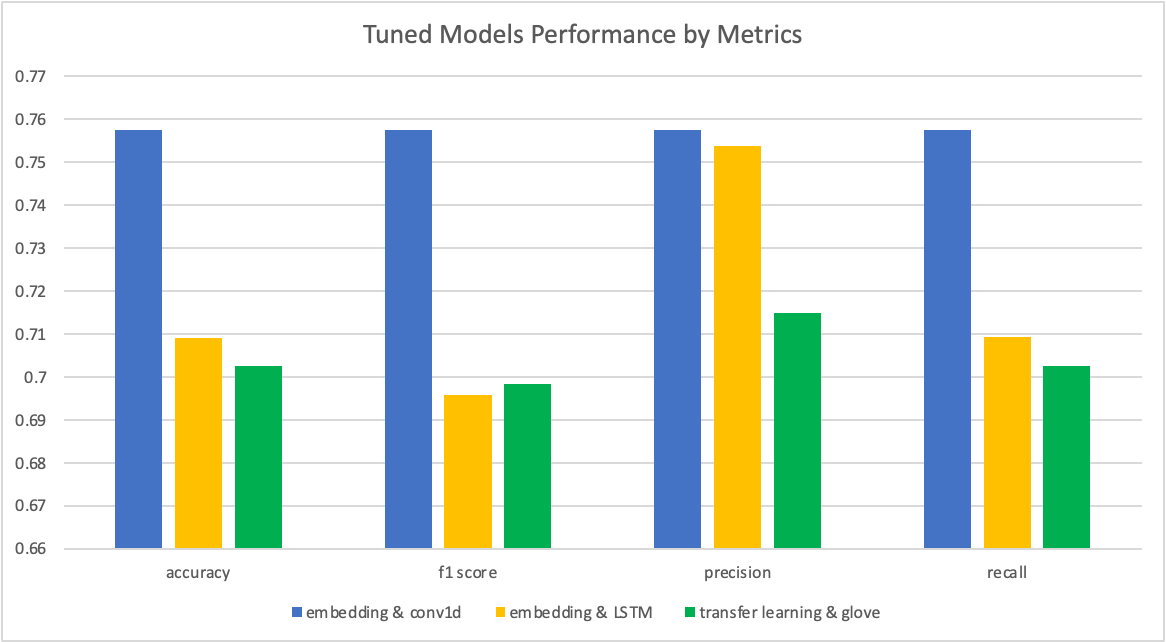

### As such, we see that for Model 1, the accuracy, f1 score, precision and recall scores are the highest, and stay very similar.

## Comparison to others on the leaderboard

### Visualization of the best models:

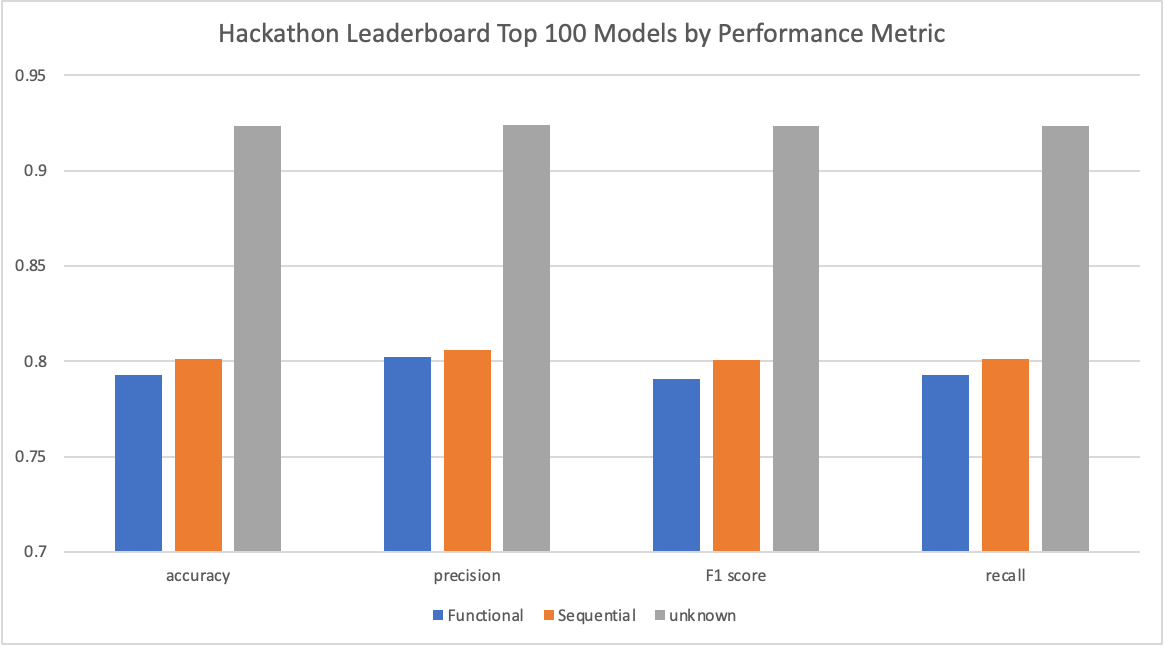

### Similar to Project 2, the best performing model was labeled as 'unknown'. While we cannot tell specifically what the best models were, we can infer that these models are either CNNs, RNNs, or LSTMs.